In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix





In [205]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [206]:
print(df.isnull())

     Order_ID  Customer_Location  Restaurant_Location  Distance  \
0       False              False                False     False   
1       False              False                False     False   
2       False              False                False     False   
3       False              False                False     False   
4       False              False                False     False   
..        ...                ...                  ...       ...   
195     False              False                False     False   
196     False              False                False     False   
197     False              False                False     False   
198     False              False                False     False   
199     False              False                False     False   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                 False               False                       False   
1                 False               False  

In [207]:
time_mapping = {
    'Afternoon': 14,  # Dataset label for 'Morning'
    'Evening': 19,
    'Night': 22
}

# Step 2: Apply it to the original column (before one-hot encoding!)
df['Order_Time_Hour'] = df['Order_Time'].map(time_mapping)

# Step 3: Drop the original string-based time column if needed
df = df.drop(columns=['Order_Time'])

# Step 4: Check the result
print(df[['Order_Time_Hour']].head())

   Order_Time_Hour
0             14.0
1             22.0
2             22.0
3             19.0
4             22.0


In [208]:
difficulty_mapping = {
    'Medium': 0,  # Dataset label for 'Morning'
    'High': 1,
    'Low': -1
}

# Step 2: Apply it to the original column (before one-hot encoding!)
df['Traffic_Conditions_New'] = df['Traffic_Conditions'].map(difficulty_mapping)

# Step 3: Drop the original string-based time column if needed
df = df.drop(columns=['Traffic_Conditions'])

# Step 4: Check the result
print(df[['Traffic_Conditions_New']].head())

   Traffic_Conditions_New
0                       0
1                       0
2                       0
3                      -1
4                       1


In [209]:
Order_difficulty_mapping = {
    'Medium': 0,  # Dataset label for 'Morning'
    'High': 1,
    'Low': -1
}

# Step 2: Apply it to the original column (before one-hot encoding!)
df['New_Order_Priority'] = df['Order_Priority'].map(Order_difficulty_mapping)

# Step 3: Drop the original string-based time column if needed
df = df.drop(columns=['Order_Priority'])

# Step 4: Check the result
print(df[['New_Order_Priority']].head())

   New_Order_Priority
0                   0
1                  -1
2                   1
3                   0
4                  -1


In [210]:
df['Vehicle_Type'].unique()

array(['Car', 'Bike', 'Bicycle'], dtype=object)

In [211]:
df = pd.get_dummies(df, columns=['Vehicle_Type'], drop_first=True)


In [212]:
print(df.columns.tolist())


['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance', 'Weather_Conditions', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Order_Time_Hour', 'Traffic_Conditions_New', 'New_Order_Priority', 'Vehicle_Type_Bike', 'Vehicle_Type_Car']


In [213]:
df = pd.get_dummies(df, columns=['Weather_Conditions'], prefix='weather', drop_first=True)


In [214]:
WEATHER_CONDITION = [
    'weather_Rainy',
    'weather_Snowy',
    
]


X = df[WEATHER_CONDITION]



In [215]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Order_Time_Hour,Traffic_Conditions_New,New_Order_Priority
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,161.000000,200.00000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650,18.006211,-0.15000,-0.085000
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706,3.279666,0.80044,0.813069
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000,14.000000,-1.00000,-1.000000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500,14.000000,-1.00000,-1.000000
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000,19.000000,0.00000,0.000000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000,22.000000,1.00000,1.000000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000,22.000000,1.00000,1.000000


In [216]:
#correlation analysis

corr = df.corr(numeric_only=True)
corr


,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Order_Time_Hour,Traffic_Conditions_New,New_Order_Priority,Vehicle_Type_Bike,Vehicle_Type_Car,weather_Rainy,weather_Snowy,weather_Sunny
Distance,1.000000,0.017562,0.064676,0.003430,-0.075143,-0.022275,-0.006466,0.161476,0.134181,-0.007464,-0.057526,-0.090784,-0.070825,0.082485,-0.038408
Delivery_Person_Experience,0.017562,1.000000,-0.004492,-0.122447,-0.019098,0.061015,-0.069218,-0.044840,-0.053745,0.131150,-0.035532,0.021715,-0.033373,0.106891,-0.013447
Restaurant_Rating,0.064676,-0.004492,1.000000,0.101661,-0.091855,-0.106870,-0.035759,0.228464,-0.026299,0.105974,-0.129838,0.148198,0.017461,0.020902,-0.076586
Customer_Rating,0.003430,-0.122447,0.101661,1.000000,-0.021952,0.142336,-0.074884,0.032304,-0.018958,-0.098679,-0.004062,0.079871,-0.048275,-0.034550,0.063798
Delivery_Time,-0.075143,-0.019098,-0.091855,-0.021952,1.000000,-0.009307,-0.029154,-0.014321,-0.055840,-0.004982,-0.091859,-0.001372,0.054402,-0.024621,-0.020492
Order_Cost,-0.022275,0.061015,-0.106870,0.142336,-0.009307,1.000000,0.034462,-0.094411,-0.032744,-0.062279,0.056296,-0.002373,-0.080923,0.123021,0.002218
Tip_Amount,-0.006466,-0.069218,-0.035759,-0.074884,-0.029154,0.034462,1.000000,0.062258,0.152003,-0.111948,0.079436,-0.077498,0.023111,-0.065083,-0.033488
Order_Time_Hour,0.161476,-0.044840,0.228464,0.032304,-0.014321,-0.094411,0.062258,1.000000,0.116685,-0.035341,-0.072912,-0.095704,0.045057,-0.110447,0.045384
Traffic_Conditions_New,0.134181,-0.053745,-0.026299,-0.018958,-0.055840,-0.032744,0.152003,0.116685,1.000000,-0.143230,0.057305,-0.009478,0.035375,-0.011730,-0.029088
New_Order_Priority,-0.007464,0.131150,0.105974,-0.098679,-0.004982,-0.062279,-0.111948,-0.035341,-0.143230,1.000000,-0.131439,0.043589,-0.043088,0.015590,0.076899


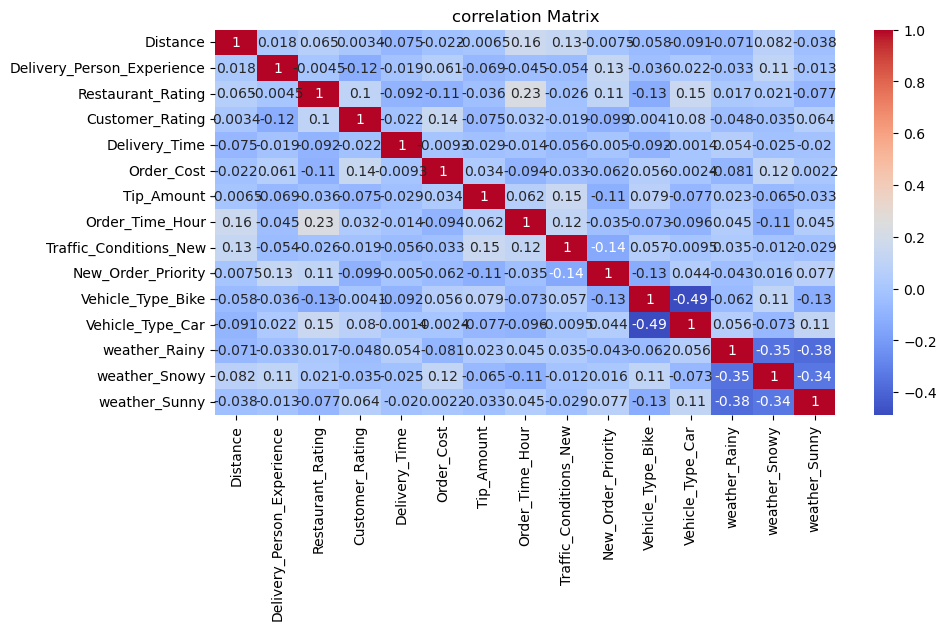

In [217]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr , annot=True , cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

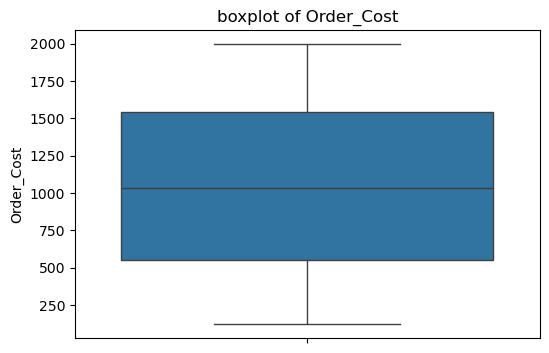

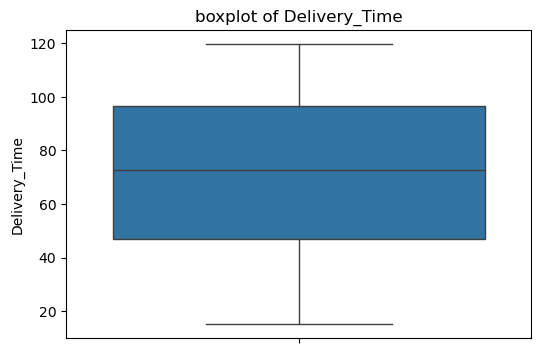

In [218]:
#outlier detection 
numrical_col = ['Order_Cost', 'Delivery_Time']

for col in numrical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}')
    plt.show()


In [219]:
# DIstance calculation 

from math import radians , sin ,cos , asin , sqrt
 
def haversine(lon1, lat1, lon2 , lat2):


    lon1,lat1, lon2 , lat2 = map(radians , [ lon1,lat1, lon2 , lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of Earth in kilometers
    return c * r




In [223]:
print(df.columns)


Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating',
       'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Order_Time_Hour',
       'Traffic_Conditions_New', 'New_Order_Priority', 'Vehicle_Type_Bike',
       'Vehicle_Type_Car', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'Delayed', 'rush_hour', 'non_rush_hour'],
      dtype='object')


In [222]:
# Define rush hour based on Order_Time_Hour
def is_rush_hour(hour):
    return 1 if (7 <= hour <= 10) or (17 <= hour <= 20) else 0

# Apply to create rush_hour column
df['rush_hour'] = df['Order_Time_Hour'].apply(is_rush_hour)

# Create non_rush_hour as the opposite
df['non_rush_hour'] = df['rush_hour'].apply(lambda x: 0 if x == 1 else 1)


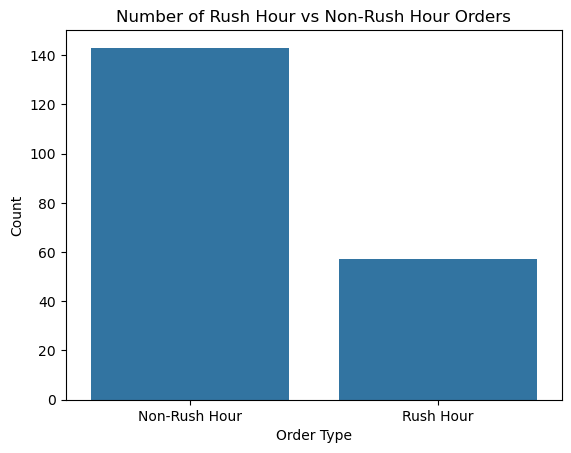

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='rush_hour')
plt.title("Number of Rush Hour vs Non-Rush Hour Orders")
plt.xticks([0, 1], ['Non-Rush Hour', 'Rush Hour'])
plt.xlabel("Order Type")
plt.ylabel("Count")
plt.show()


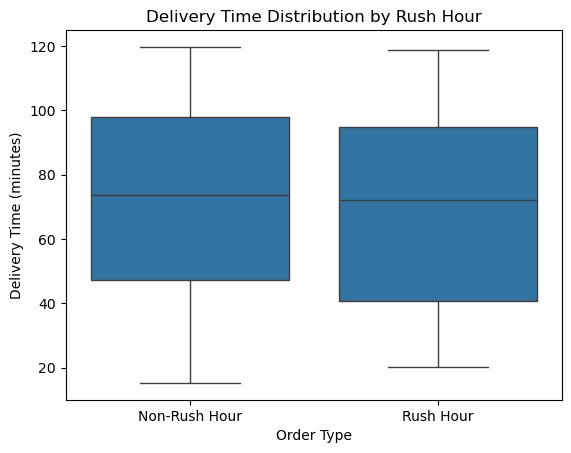

In [225]:
sns.boxplot(data=df, x='rush_hour', y='Delivery_Time')
plt.title("Delivery Time Distribution by Rush Hour")
plt.xticks([0, 1], ['Non-Rush Hour', 'Rush Hour'])
plt.xlabel("Order Type")
plt.ylabel("Delivery Time (minutes)")
plt.show()


In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dat

# Define features for linear regression
features = [
    'Traffic_Conditions_New', 
    'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
    'Delivery_Person_Experience', 
    'New_Order_Priority', 
    'Vehicle_Type_Bike', 'Vehicle_Type_Car',
    'Distance', 'Restaurant_Rating', 'Customer_Rating'
]

X = df[features]
y = df['Delivery_Time']

In [232]:
X_train, X_test, y_Lin_train, y_Lin_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [233]:
reg=LinearRegression()
reg.fit(X_train,y_Lin_train)

LinearRegression()

In [241]:
y_pred = reg.predict(X_test)
y_pred

array([72.13025074, 65.19740102, 74.61009109, 56.9888    , 68.83740577,
       83.10800223, 78.38414953, 65.93064287, 68.88256742, 74.73736599,
       66.54403581, 78.94250841, 73.89563102, 75.72308505, 80.81087016,
       59.14055599, 62.32604213, 77.81202196, 75.96026626, 81.87531952,
       83.44538609, 70.2210935 , 63.04492867, 73.47932677, 65.14817253,
       67.53520298, 79.0423928 , 66.60140554, 69.65316193, 76.10272622,
       68.77109896, 67.43984475, 70.4079991 , 63.86469172, 70.20792542,
       69.29840348, 67.9001934 , 78.73872163, 75.62725459, 79.95506662])

In [236]:
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_Lin_test, y_pred))
print("R² Score:", r2_score(y_Lin_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_Lin_test, y_pred))

Coefficients: [-2.11435414  7.45842601  1.52484495  1.63011507 -1.10061125 -0.70761784
 -9.44854815 -5.32158802 -0.14395996 -2.8765553  -1.16530282]
Intercept: 94.99561482467229
Mean Squared Error (MSE): 1002.6224793908153
R² Score: -0.08404368985255029
Mean Absolute Error (MAE): 26.816660932615463


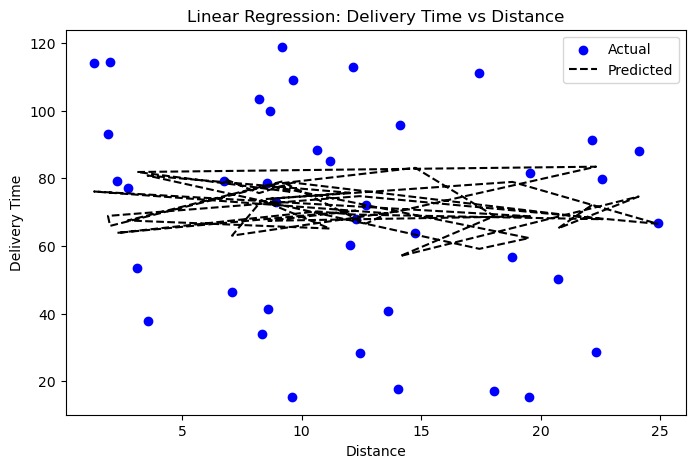

In [243]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test['Distance'], y_Lin_test, color='blue', label='Actual')
plt.plot(X_test['Distance'], y_pred, color='black', linestyle='dashed', label='Predicted')
plt.xlabel("Distance")
plt.ylabel("Delivery Time")
plt.title("Linear Regression: Delivery Time vs Distance")
plt.legend()
plt.show()

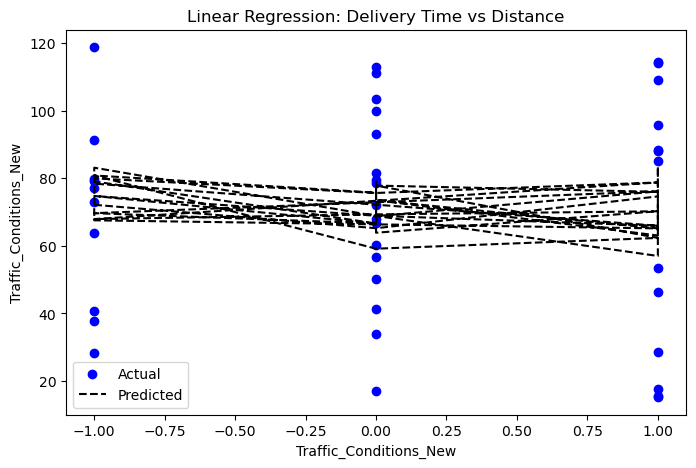

In [244]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test['Traffic_Conditions_New'], y_Lin_test, color='blue', label='Actual')
plt.plot(X_test['Traffic_Conditions_New'], y_pred, color='black', linestyle='dashed', label='Predicted')
plt.xlabel("Traffic_Conditions_New")
plt.ylabel("Traffic_Conditions_New")
plt.title("Linear Regression: Delivery Time vs Distance")
plt.legend()
plt.show()

In [248]:
df['Delayed'] = (df['Delivery_Time'] > 30).astype(int)

In [250]:
X = df[features]
y = df['Delayed']

In [251]:
X_train, X_test, y_Log_train, y_Log_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_Log_train)


LogisticRegression()

In [253]:
y_pred_log = model.predict(X_test)
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

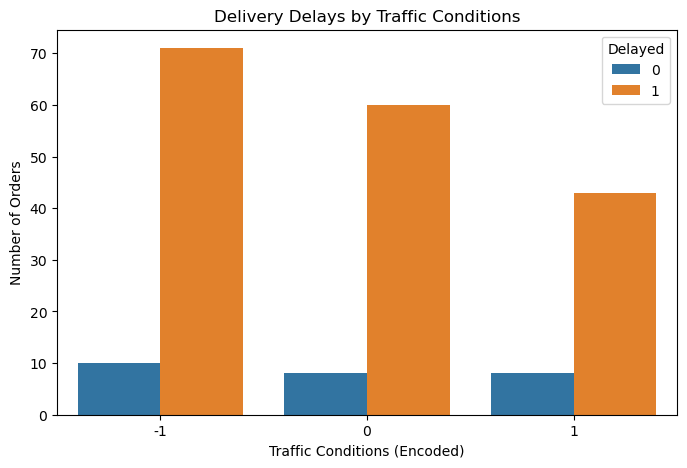

In [258]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Traffic_Conditions_New', hue='Delayed')
plt.title("Delivery Delays by Traffic Conditions")
plt.xlabel("Traffic Conditions (Encoded)")
plt.ylabel("Number of Orders")
plt.legend(title="Delayed")
plt.show()


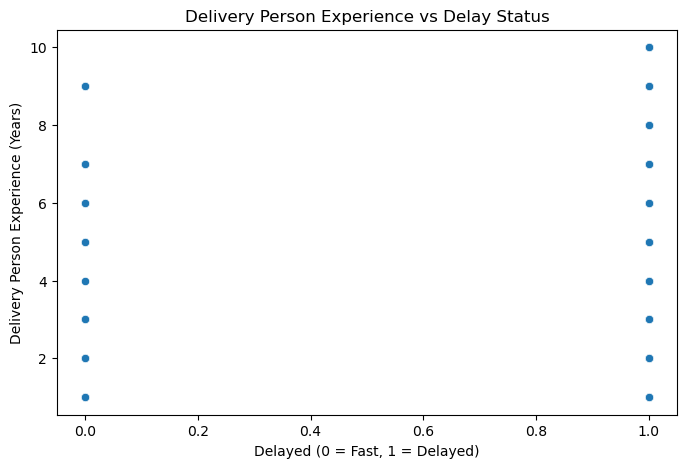

In [261]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Delayed', y='Delivery_Person_Experience')
plt.title("Delivery Person Experience vs Delay Status")
plt.xlabel("Delayed (0 = Fast, 1 = Delayed)")
plt.ylabel("Delivery Person Experience (Years)")
plt.show()

In [255]:
print("Accuracy:", accuracy_score(y_Log_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_Log_test, y_pred_log))
print("Classification Report:\n", classification_report(y_Log_test, y_pred_log))

Accuracy: 0.85
Confusion Matrix:
 [[ 0  6]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40



c:\Users\Suyog\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suyog\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suyog\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [262]:
y_pred_linear_binary = (y_pred > 30).astype(int)
y_true_binary = (y_Lin_test > 30).astype(int)


In [263]:
# Already trained
y_pred_logistic = model.predict(X_test)

# Probabilities for ROC
y_probs_logistic = model.predict_proba(X_test)[:, 1]


In [264]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy comparison
acc_linear = accuracy_score(y_true_binary, y_pred_linear_binary)
acc_logistic = accuracy_score(y_Log_test, y_pred_logistic)

print("----- Accuracy Comparison -----")
print(f"Linear Regression (as classifier): {acc_linear:.2f}")
print(f"Logistic Regression: {acc_logistic:.2f}")


----- Accuracy Comparison -----
Linear Regression (as classifier): 0.85
Logistic Regression: 0.85


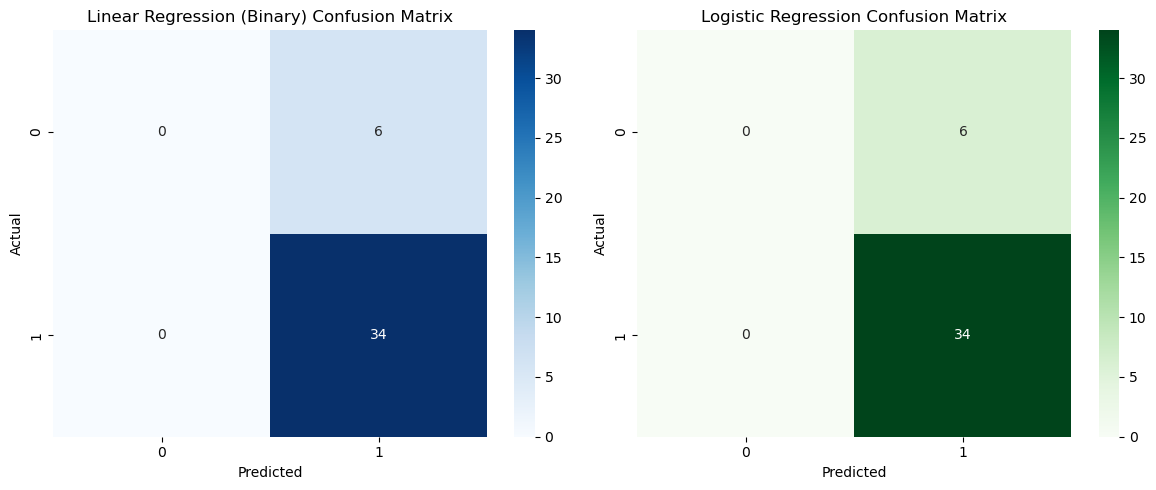

In [265]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_linear = confusion_matrix(y_true_binary, y_pred_linear_binary)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Linear Regression (Binary) Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cm_logistic = confusion_matrix(y_Log_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


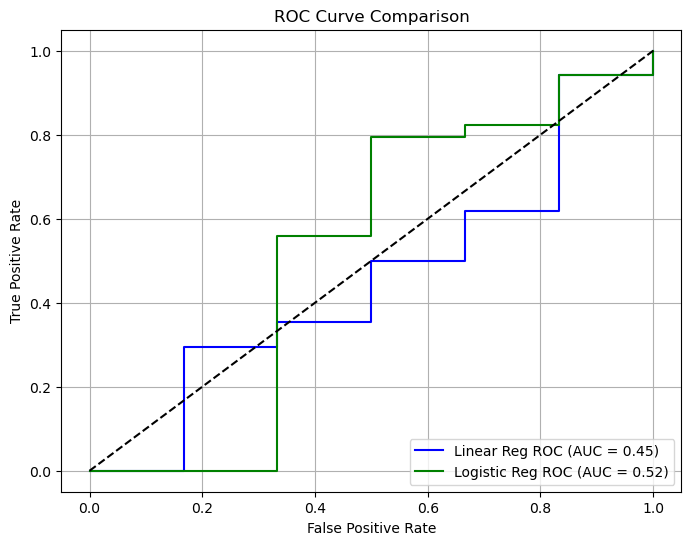

In [266]:
from sklearn.metrics import roc_curve, auc

# Linear Regression ROC
fpr_lin, tpr_lin, _ = roc_curve(y_true_binary, y_pred)
auc_lin = auc(fpr_lin, tpr_lin)

# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_Log_test, y_probs_logistic)
auc_log = auc(fpr_log, tpr_log)

# Plot both
plt.figure(figsize=(8, 6))
plt.plot(fpr_lin, tpr_lin, label=f'Linear Reg ROC (AUC = {auc_lin:.2f})', color='blue')
plt.plot(fpr_log, tpr_log, label=f'Logistic Reg ROC (AUC = {auc_log:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()
